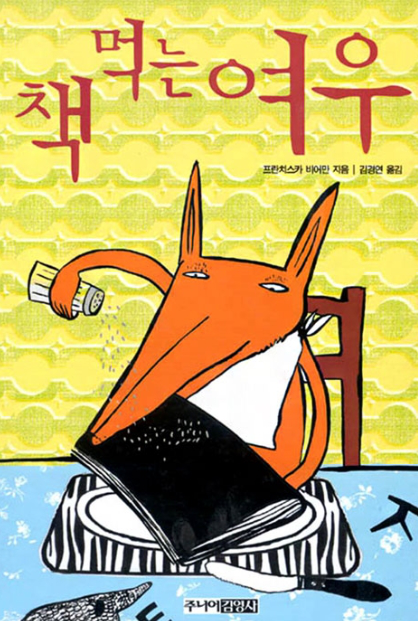

In [2]:
from PIL import Image

from collections import deque
import requests
from io import BytesIO


image_url = "https://imagebucket606.s3.ap-northeast-2.amazonaws.com/5555.jpg"

response = requests.get(image_url)
if response.status_code == 200:
    # 이미지 데이터를 BytesIO 객체로 읽기
    image_data = BytesIO(response.content)

    # BytesIO에서 이미지 열기
    image = Image.open(image_data)

image

In [3]:
import torch
from torchvision import datasets, models, transforms

In [4]:
class ResizeToFraction:
    def __init__(self, scale_factor):
        self.scale_factor = scale_factor

    def __call__(self, image):
        w, h = image.size
        new_w = int(w * self.scale_factor)
        new_h = int(h * self.scale_factor)
        return image.resize((new_w, new_h), Image.BILINEAR)

# 이미지 데이터 패딩
class PadToFixedSize:
    def __init__(self, output_size, padding_value=0):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            self.output_size = output_size
        self.padding_value = padding_value

    def __call__(self, image):
        w, h = image.size

        # 원하는 출력 크기와 이미지 크기 간의 차이 계산
        delta_w = max(0, self.output_size[0] - w)
        delta_h = max(0, self.output_size[1] - h)

        # 패딩을 좌우, 상하에 반으로 분배
        pad_left = delta_w // 2
        pad_right = delta_w - pad_left
        pad_top = delta_h // 2
        pad_bottom = delta_h - pad_top

        # 패딩 적용
        padding = (pad_left, pad_top, pad_right, pad_bottom)
        image = transforms.functional.pad(image, padding, fill=self.padding_value)

        return image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transforms_test = transforms.Compose([
    ResizeToFraction(0.1), # 이미지 크기 축소
    PadToFixedSize((600, 600)), # 이미지 패딩
    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

image = transforms_test(image).unsqueeze(0).to(device)

In [5]:
image

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -